# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнил студент гр.0383 Желнин Максим. Вариант 54



## Цель работы:

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

##Основные теоретические сведения

***n-клика*** - максимальный подграф, в котором наибольшее геодезическое расстояние

***n-клан*** - это $n$-клика, в которой геодезическое расстояние $d(i,j)$ между всеми узлами в подграфе не превышает $n$ для путей внутри подграфа

***k-ядро*** - это максимальный подграф, в котором каждая вершина связана минимум с $k$ другими вершинами этого же подграфа

***n-клубы*** - максимальный подграф диаметра меньше либо равного n.

***k-плекс*** - это максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен не менее с чем с $(g_s - k)$ узлами подграфа:

$$d_s(i) \geq g_s - k, \forall n \in N_s$$

***Матрица инцидентности*** - мактрица I размерности g*L, описывающая какие линии каким узлом инцидентны.

***Двудольный граф (биграф)*** - граф, узлы которого можно разделить на 2 подмножества, а все ребра соединяют узлы, принадлежащие разным подмножествам.

***Сеть аффилированности*** - сеть, в которой участники аффилированны друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определенном событии.

***Матрица соучастия акторов***:
$$X^N = \{x_{ij}^N\}$$

$$x_{ij}^N = \sum_{k=1}^ha_{ik}a_{jk}$$

$$X^N = AA^T$$

***Матрица перекрытия событий***:
$$X^M = \{x_{kl}^M\}$$

$$x_{kl}^M = \sum_{i=1}^ga_{ik}a_{il}$$

$$X^M = A^TA$$

***Клика уровня c*** - максимальный полный подграф из 3 или более узлов, все из которыз являются смежными на уровне c, т.е. между всеми парами узлов есть ребра со значениями большими или равными c.




##Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети 
аффилированности CEO. Полученные результаты содержательно проинтерпретировать.





##Выполнение работы

In [ ]:
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('network')){
        install.packages('network')
        library('network')
}
if(!require('sna')){
        install.packages('sna')
        library('sna')
}
if(!require('intergraph')){
        install.packages('intergraph')
        library('intergraph')
}

if(!require('statnet')){
        install.packages('statnet')
        library('statnet')
}


if(!require('HyperG')){
        install.packages('HyperG')
        library('HyperG')
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: network

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘network’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’



‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attachin

1) Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.


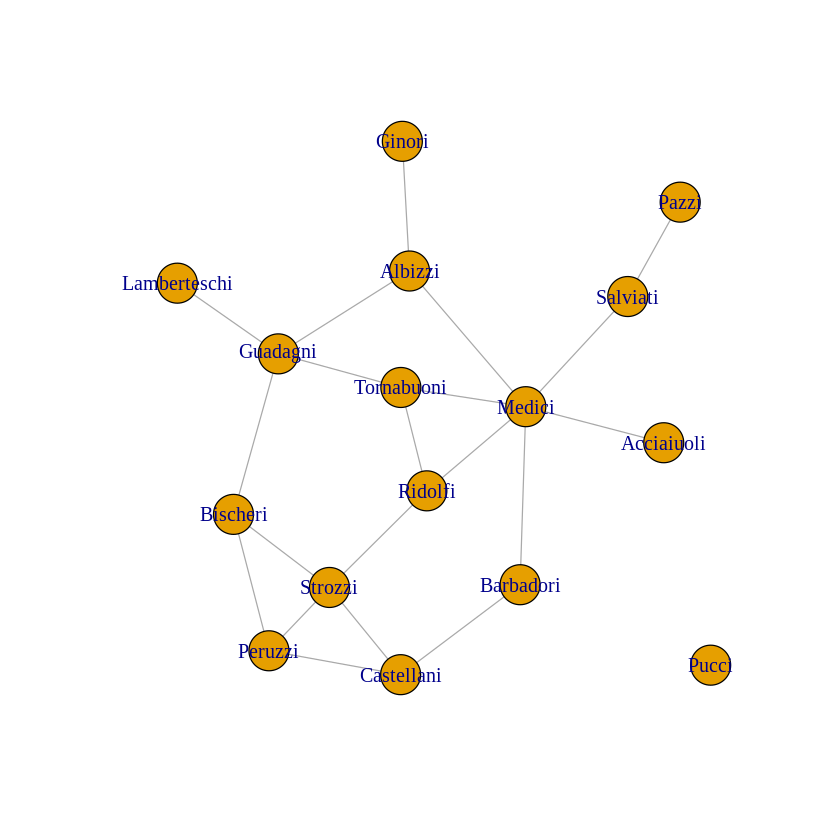

In [ ]:
flor_mar <- read.table("./florentine_marital.csv", header = TRUE, sep=',')
rownames(flor_mar) <- colnames(flor_mar)
data_matrix = as.matrix(flor_mar)
flor_mar_net <- graph_from_adjacency_matrix(as.matrix(flor_mar), mode = "undirected")
plot(flor_mar_net, layout=layout_with_fr(flor_mar_net))

2) Исследовать данную сеть на предмет подгрупп с помощью:
# n-клик

In [ ]:
flor_mar_graph <- graph.adjacency(as.matrix(flor_mar_net), mode="undirected")
prior <- 1
clique_len <- 2
cliques <-list()
while(clique_len > 1){
  cliques_cur <- max_cliques(connect(flor_mar_graph, order=prior),min=3)
  cliques_cur<-lapply(cliques_cur, function(tmp) names(tmp))
  names(cliques_cur) <- rep(paste(prior,"клика",sep= "-"),times = length(cliques_cur))
  cliques <- c(cliques,cliques_cur)
  prior <- prior + 1
  clique_len <- length(cliques_cur)
}

cliques


Warning message in connect(flor_mar_graph, order = prior):
“At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged.”


$`1-клика`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-клика`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1-клика`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2-клика`
[1] "Pazzi"    "Medici"   "Salviati"

$`2-клика`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2-клика`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2-клика`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2-клика`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Barbadori" 

$`2-клика`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2-клика`
[1] "Guadagni" "Ridolfi"  "Peruzzi"  "Strozzi"  "Bischeri"

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Bischeri"  

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Medici"    

$`2-клика`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`2-клика`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Strozzi"   

$`3-клика`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3-клика`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Bischeri"  

$`3-клика`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3-клика`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3-клика`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Salviati"   "Acciaiuoli"

$`3-клика`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3-клика`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4-клика`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4-клика`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5-клика`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

Вывод: 
Самая большая клика размера 5, она содержит в себе всю компоненту, следовательно больше быть не может.

# n-кланы

In [ ]:
check_for_clan <- function(graph, clique, name){
  if(diameter(subgraph(graph,clique),directed = FALSE) > unlist(strsplit(name,"-"))[1]){
    return(FALSE)
  }
  return (TRUE)
}

clique_index <- sapply(1:length(cliques), function(tmp) check_for_clan(flor_mar_graph,cliques[[tmp]],names(cliques)[tmp]))
names(cliques)<-sapply(names(cliques), function(tmp) paste(unlist(strsplit(tmp,"-"))[1],"-клан",sep = ""))
cliques[clique_index]

$`1-клан`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-клан`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1-клан`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2-клан`
[1] "Pazzi"    "Medici"   "Salviati"

$`2-клан`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2-клан`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2-клан`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2-клан`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2-клан`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2-клан`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2-клан`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`3-клан`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3-клан`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3-клан`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3-клан`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3-клан`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4-клан`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4-клан`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5-клан`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

Вывод:
Аналогично кликам, клан размера 5 содержит все акторы в компоненте связности => больше в графе быть не может

# k-ядер


In [ ]:
core_info <- coreness(flor_mar_graph, mode= "all")
cores <-lapply(0:max(as.integer(core_info)), function(tmp) names(core_info)[which(as.integer(core_info) >= tmp)])
names(cores) <- sapply(1:length(cores), function(tmp) paste(tmp-1," ядро",sep= " -"))

cores

$`0 - ядро`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Pucci"        "Ridolfi"      "Salviati"     "Strozzi"     
[16] "Tornabuoni"  

$`1 - ядро`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`2 - ядро`
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

Вывод: 
Не удалось посчитать остальные составляющие.

3) С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта.

(3) InfoMAP, Louvain, Optimal.

Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

Данные алгоритмы служат для нахождения сообществ в сети.

InfoMAP - алгоритм, находящий сообщество,в котором ожидаемая длина описания траектории минимизируется для случайного объекта блуждания.

Louvain - алгоритм, который по сути является жадным методом оптимизации. Сначала алгоритм обнаруживает маленькие сообщества при помощи локальной оптимизации модульности на всех узлах, а потом группирует эти сообщества по узлам и повторяет алгоритм.

Optimal - алгоритм, который ищет сообщества максимизируя модульность.

Louvain

In [ ]:
lou_res <- cluster_infomap(flor_mar_graph)
print(paste("модульность",modularity(lou_res),sep= " - "))
for(i in 1:length(lou_res)){
  print(lou_res[i])
}


[1] "модульность - 0.3975"
$`1`
[1] "Acciaiuoli" "Medici"     "Ridolfi"    "Tornabuoni"

$`2`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pazzi"    "Salviati"

$`5`
[1] "Pucci"



InfoMAP

In [ ]:
  info_res <- cluster_louvain(flor_mar_graph)
  print(paste("модулярность",modularity(info_res),sep= " - "))
  for(i in 1:length(info_res)){
    print(info_res[i])
  }


[1] "модулярность - 0.39875"
$`1`
[1] "Acciaiuoli" "Medici"     "Pazzi"      "Ridolfi"    "Salviati"  
[6] "Tornabuoni"

$`2`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pucci"



Optimal(не нашёл фикса)

In [ ]:
  opt_res <- cluster_optimal(flor_mar_graph)
  print(paste("модулярность",modularity(opt_res),sep= " - "))
  for(i in 1:length(opt_res)){
    print(opt_res[i])
  }

ERROR: ignored

Вывод: Оба алгоритма дали примерно схожее значение модулярности, однако сообщества получились разные. В целом исходя из алогритма, который иеализует infoMAP неудивительно, что сообществ там получилось меньше.

4)  Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

In [ ]:
ceo_table <-read.csv("./ceo.csv",header = F,skip = 9)
colnames(ceo_table) <- NULL
ceo_incident_matr <- as.matrix(ceo_table)

print(ceo_incident_matr)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    1    1    0    0    0    0    1     0     0     0     0
 [2,]    0    0    1    0    1    0    1    0    0     0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     1     0
 [4,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     0     0     1
 [6,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    1    1    0    0    0    0    0     1     1     0     0
 [8,]    0    0    0    1    0    0    1    0    0     1     0     0     0
 [9,]    1    0    0    1    0    0    0    1    0     1     0     0     0
[10,]    0    0    1    0    0    0    0    0    1     0     0     0     0
[11,]    0    1    1    0    0    0    0    0    1     0     0     0     0
[12,]    0    0    0    1    0    0    1    0    0     0     0     0     0
[13,]    0    0    1    1

5)Отобразить сеть в виде биграфа

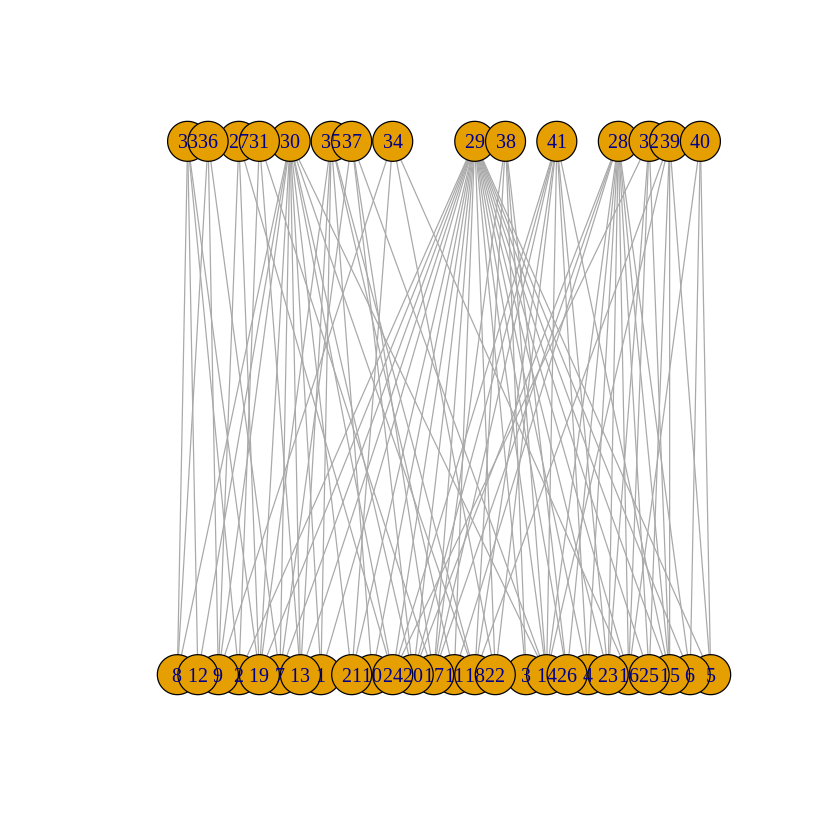

In [ ]:
  top <-cbind(matrix(0,nrow = nrow(ceo_incident_matr),ncol = nrow(ceo_incident_matr)), ceo_incident_matr)
  bottom <-cbind(t(ceo_incident_matr), matrix(0,nrow = ncol(ceo_incident_matr), ncol = ncol(ceo_incident_matr)))
  tmp_ceo_list <- rbind(top,bottom)
  type_template <-sapply(1:(nrow(ceo_incident_matr) + ncol(ceo_incident_matr)), function(tmp) if (tmp <= nrow(ceo_incident_matr)) TRUE else FALSE)
  ceo_bi_graph <-graph.adjacency(tmp_ceo_list, mode = "undirected")
  V(ceo_bi_graph)$type <-type_template
  

  layout_bi <-layout_as_bipartite(ceo_bi_graph,V(ceo_bi_graph)$type)
  plot.igraph(ceo_bi_graph, layout= layout_bi,rescale = T)


7) Представить сеть аффилированности в виде двух одномодальных
сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов.
Сделать выводы.

Соучастие: 


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    3    1    1    1    1    1    2    1    1     2     2     1     3
 [2,]    1    3    1    1    1    1    1    1    0     1     1     1     2
 [3,]    1    1    2    1    1    1    1    0    0     1     1     0     1
 [4,]    1    1    1    3    1    2    1    0    0     1     2     0     1
 [5,]    1    1    1    1    3    2    1    0    0     1     1     0     1
 [6,]    1    1    1    2    2    3    1    0    0     1     2     0     1
 [7,]    2    1    1    1    1    1    4    2    2     1     1     1     2
 [8,]    1    1    0    0    0    0    2    3    2     0     0     2     1
 [9,]    1    0    0    0    0    0    2    2    4     0     0     1     1
[10,]    2    1    1    1    1    1    1    0    0     2     2     0     2
[11,]    2    1    1    2    1    2    1    0    0     2     3     0     2
[12,]    1    1    0    0    0    0    1    2    1     0     0     2     1
[13,]    3    2    1    1

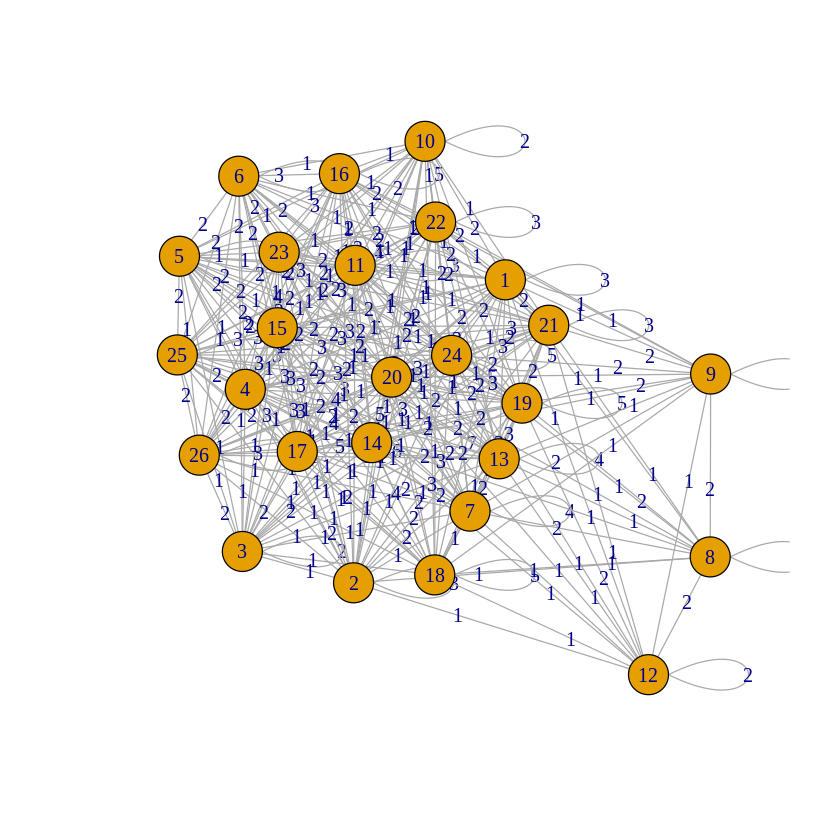

In [ ]:
souch_matr <- ceo_incident_matr %*% t(ceo_incident_matr)
souch_graph <-graph.adjacency(souch_matr,weighted = TRUE,mode = "undirected")
plot(souch_graph, edge.label = E(souch_graph)$weight)
print(souch_matr)

Перекрытие событий:


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    3    0    2    3    0    1    1    1    1     1     0     0     0
 [2,]    0   11   11    2    1    3    0    1    1     0     3     3     3
 [3,]    2   11   22    8    3    4    2    3    5     1     4     4     4
 [4,]    3    2    8   12    1    1    3    2    4     3     3     2     2
 [5,]    0    1    3    1    3    0    1    0    1     0     1     1     0
 [6,]    1    3    4    1    0    4    0    1    0     0     0     0     1
 [7,]    1    0    2    3    1    0    4    0    1     1     0     0     0
 [8,]    1    1    3    2    0    1    0    4    0     1     0     0     0
 [9,]    1    1    5    4    1    0    1    0    6     0     0     1     1
[10,]    1    0    1    3    0    0    1    1    0     3     1     0     0
[11,]    0    3    4    3    1    0    0    0    0     1     4     2     1
[12,]    0    3    4    2    1    0    0    0    1     0     2     5     2
[13,]    0    3    4    2

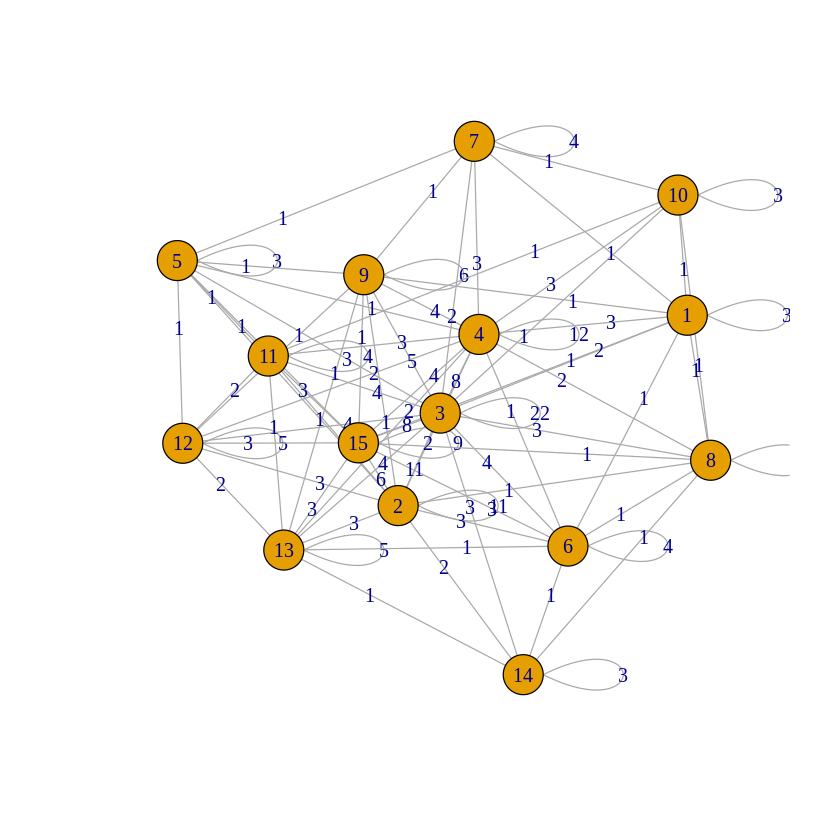

In [ ]:
over_matr <- t(ceo_incident_matr) %*% ceo_incident_matr
over_graph <- graph.adjacency(over_matr, weighted = TRUE, mode = "undirected")
plot(over_graph, edge.label = E(over_graph)$weight)
print(over_matr)


8) Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.


In [ ]:
uch_degree <- diag(souch_matr)
names(uch_degree) <- sapply(1:length(uch_degree), function(tmp) paste("",tmp,sep = " "))
uch_degree_norm <- mean(uch_degree)
print(list(Uchastie = uch_degree, NormirovannoeUchastie = uch_degree_norm))

$Uchastie
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   3   2   3   3   3   4   3   4   2   3   2   4   7   5   5   6   5   5   5 
 21  22  23  24  25  26 
  3   3   4   5   3   3 

$NormirovannoeUchastie
[1] 3.769231



Выводы: 
Средняя степень участия 3.7, то есть каждый актор в среднем связан с 3.7 событиями. Учитывая, что событий всего 15, это не слишком много.

9) Вычислить размер и средний размер для каждого события. Сделать выводы.

In [ ]:
over_size <- diag(over_matr)
names(over_size) <-sapply(1:length(over_size), function(tmp) paste("",tmp,sep= " ") )
over_size_norm <- mean(over_size)
print(list(Size = over_size, NormSize = over_size_norm))

$Size
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
  3  11  22  12   3   4   4   4   6   3   4   5   5   3   9 

$NormSize
[1] 6.533333



Выводы: Можно наблюдать очень большой разброс, например в сравнении 1 и 3 событий, но при этом средний размер оказывается не таким уж и большим, для такого количества акторов.

10) Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.


In [ ]:
x1 <- nrow(souch_matr)
x2 <-nrow(over_matr)
part_dens <- (sum(souch_matr)-sum(uch_degree))/(x1*(x1-1))
over_dens <- (sum(over_matr)-sum(over_size))/(x2*(x2-1))
print(list("Плотность соучастия" = part_dens, "Плотность перекрытия" = over_dens))

$`Плотность соучастия`
[1] 1.412308

$`Плотность перекрытия`
[1] 1.485714



Выводы: оба значения плотности получились низкими, но если сделать отношения к максимально возможному значению, то относительная плотность соучастия получится больше

11) Определить диаметр сети аффилированности

In [ ]:
diameter(ceo_bi_graph)

[1] 5

12) Определить клики уровня 𝑐 = {4, 3} для отношения соучастия и
клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий.
Сделать выводы.


Соучастие: 

In [ ]:
levels <- c(3,4)
all_cliques <- list()

for(i in levels){
  new_souch_graph <-graph.adjacency(souch_matr,weighted = TRUE,mode = "undirected")
  templ <- E(new_souch_graph)$weight < i
  del_nodes <- E(new_souch_graph)[templ]
  new_souch_graph <- delete_edges(new_souch_graph,del_nodes)
  new_cliques <- cliques(new_souch_graph,min = 3)
  names(new_cliques) <- rep(paste(i,"клика",sep =" уровня "), length(new_cliques))
  all_cliques <- c(all_cliques,new_cliques)
}

print(all_cliques)

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 14 20 23

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1]  7 14 20

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1]  1 13 19

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 15 20 23

$`3 уровня клика`
+ 4/26 vertices, from be9322c:
[1] 14 15 20 23

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 15 16 23

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 14 15 23

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 14 15 25

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 14 15 20

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 15 17 23

$`3 уровня клика`
+ 4/26 vertices, from be9322c:
[1] 15 17 20 23

$`3 уровня клика`
+ 5/26 vertices, from be9322c:
[1] 14 15 17 20 23

$`3 уровня клика`
+ 4/26 vertices, from be9322c:
[1] 14 15 17 23

$`3 уровня клика`
+ 3/26 vertices, from be9322c:
[1] 15 17 20

$`3 уровня клика`
+ 4/26 vertices, from be9322c:
[1] 14 15 17 20

$`3 уровня клика`
+ 3/26 vertices, fr

Перекрытия: 


In [ ]:
levels_over <-c(2,3,4,5,6)

all_cliques_over <- list()

for(i in levels_over){
  new_over_graph <-graph.adjacency(over_matr,weighted = TRUE,mode = "undirected")
  templ <- E(new_over_graph)$weight < i
  del_nodes <- E(new_over_graph)[templ]
  new_over_graph <- delete_edges(new_over_graph,del_nodes)
  new_cliques <- cliques(new_over_graph,min = 3)
  names(new_cliques) <- rep(paste(i,"клика",sep =" уровня "), length(new_cliques))
  all_cliques_over <- c(all_cliques_over,new_cliques)
}

print(all_cliques_over)

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  3  6 15

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  3  4 15

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1] 3 4 9

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1] 3 4 8

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1] 3 4 7

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1] 1 3 4

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  4 12 15

$`2 уровня клика`
+ 4/15 vertices, from 208e768:
[1]  3  4 12 15

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  3 12 15

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  3  4 12

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  2 12 15

$`2 уровня клика`
+ 4/15 vertices, from 208e768:
[1]  2  4 12 15

$`2 уровня клика`
+ 5/15 vertices, from 208e768:
[1]  2  3  4 12 15

$`2 уровня клика`
+ 4/15 vertices, from 208e768:
[1]  2  3 12 15

$`2 уровня клика`
+ 3/15 vertices, from 208e768:
[1]  2  4 12

$`2 уровня клика`
+ 4/15 vertices, from 208e768:
[1]

13) Для каждых пар событий определить отношение шансов. Сделать выводы

In [ ]:
kl <- t(ceo_incident_matr) %*% ceo_incident_matr
nkl <- (1-t(ceo_incident_matr))%*%(1-ceo_incident_matr)
nk_l <- (1-t(ceo_incident_matr))%*%ceo_incident_matr
knl <- t(ceo_incident_matr)%*%(1-ceo_incident_matr)

chances <- c()
for(i in 2:nrow(kl)){
  for(j in 1:(i-1)){
    name <- paste(i,"и",j,"события",sep=" ")
    pos <- (kl[i,j]*nkl[i,j])/(nk_l[i,j]*knl[i,j])
    chances[name] <-pos
  }
}


print(chances)

  2 и 1 события   3 и 1 события   3 и 2 события   4 и 1 события   4 и 2 события 
     0.00000000      0.30000000             Inf             Inf      0.11111111 
  4 и 3 события   5 и 1 события   5 и 2 события   5 и 3 события   5 и 4 события 
     0.00000000      0.00000000      0.65000000             Inf      0.54545455 
  6 и 1 события   6 и 2 события   6 и 3 события   6 и 4 события   6 и 5 события 
     3.33333333      5.25000000             Inf      0.33333333      0.00000000 
  7 и 1 события   7 и 2 события   7 и 3 события   7 и 4 события   7 и 5 события 
     3.33333333      0.00000000      0.10000000      4.33333333      3.33333333 
  7 и 6 события   8 и 1 события   8 и 2 события   8 и 3 события   8 и 4 события 
     0.00000000      3.33333333      0.40000000      0.47368421      1.20000000 
  8 и 5 события   8 и 6 события   8 и 7 события   9 и 1 события   9 и 2 события 
     0.00000000      2.11111111      0.00000000      1.80000000      0.20000000 
  9 и 3 события   9 и 4 собы

Выводы: в таблице можно заметить, что присутствуют 0, которые говорят нам о невозможности попадания сразу в два события, а также бесконечности, которые говорят нам о том, что попав в одно, мы обязательно попадём и в другое

# Выводы 

Были получены навыки работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.